In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer
import seaborn as sns

In [2]:
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

print("Dataset shape:", df.shape)
print("\nNumber of features:", len(data.feature_names))
print("\nTarget distribution:")
print(df['target'].value_counts())
print("\nFirst few rows:")
print(df.iloc[:, :5].head())

Dataset shape: (569, 31)

Number of features: 30

Target distribution:
target
1    357
0    212
Name: count, dtype: int64

First few rows:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness
0        17.99         10.38          122.80     1001.0          0.11840
1        20.57         17.77          132.90     1326.0          0.08474
2        19.69         21.25          130.00     1203.0          0.10960
3        11.42         20.38           77.58      386.1          0.14250
4        20.29         14.34          135.10     1297.0          0.10030


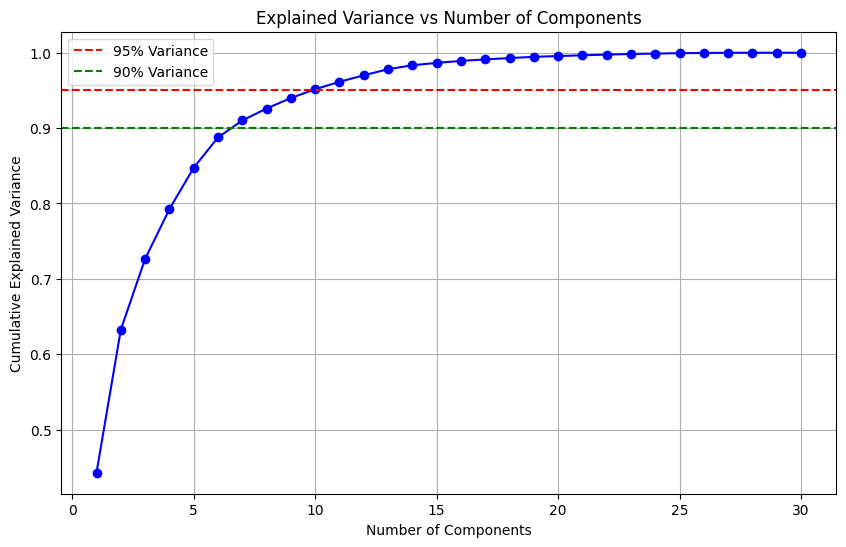


Components for 90% variance: 7
Components for 95% variance: 10


In [3]:
X = df.drop('target', axis=1)
y = df['target']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca_full = PCA()
X_pca_full = pca_full.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca_full.explained_variance_ratio_) + 1), 
         np.cumsum(pca_full.explained_variance_ratio_), 'bo-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs Number of Components')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance')
plt.axhline(y=0.90, color='g', linestyle='--', label='90% Variance')
plt.legend()
plt.grid(True)
plt.show()

n_components_90 = np.argmax(np.cumsum(pca_full.explained_variance_ratio_) >= 0.90) + 1
n_components_95 = np.argmax(np.cumsum(pca_full.explained_variance_ratio_) >= 0.95) + 1

print(f"\nComponents for 90% variance: {n_components_90}")
print(f"Components for 95% variance: {n_components_95}")

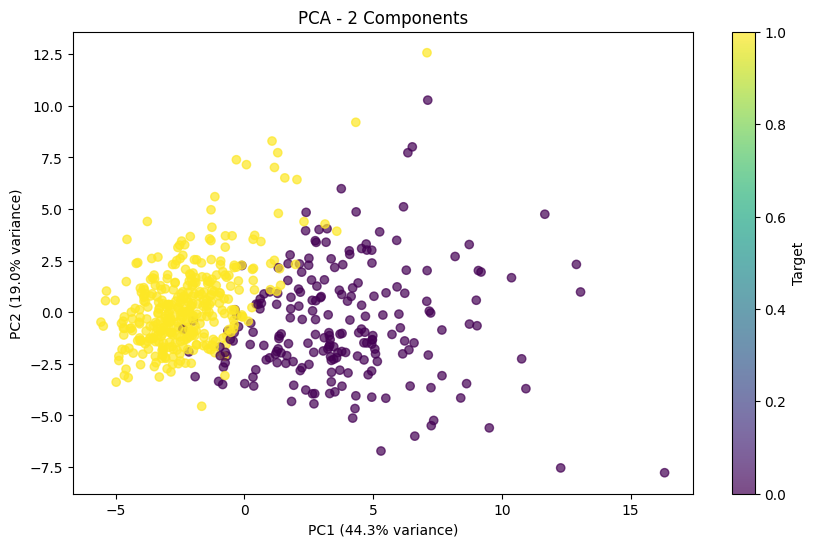


--- PCA Results ---
Total variance explained by 2 components: 63.24%


In [4]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Target')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% variance)')
plt.title('PCA - 2 Components')
plt.show()

total_variance = sum(pca.explained_variance_ratio_) * 100
print(f"\n--- PCA Results ---")
print(f"Total variance explained by 2 components: {total_variance:.2f}%")

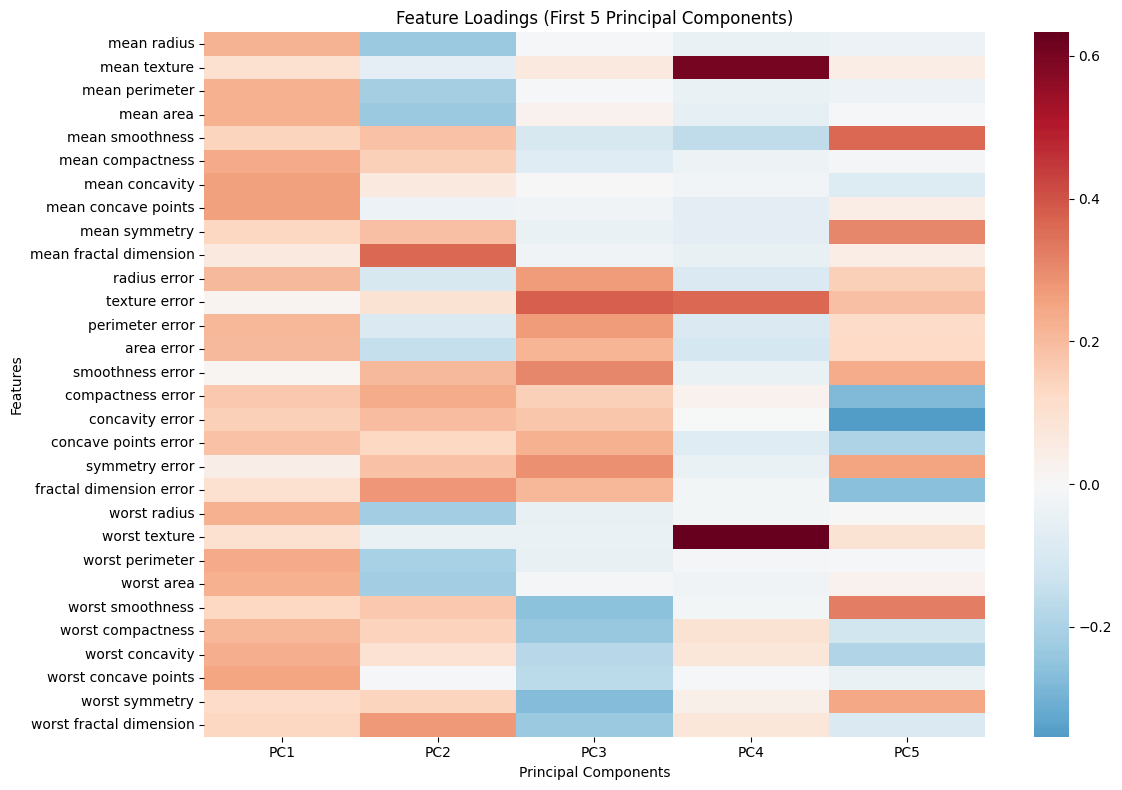


Top 5 features for PC1:
mean concave points     0.260854
mean concavity          0.258400
worst concave points    0.250886
mean compactness        0.239285
worst perimeter         0.236640
Name: PC1, dtype: float64

Top 5 features for PC2:
mean fractal dimension     0.366575
fractal dimension error    0.280092
worst fractal dimension    0.275339
mean radius                0.233857
compactness error          0.232716
Name: PC2, dtype: float64


In [5]:
loadings = pd.DataFrame(pca_full.components_.T, 
                        columns=[f'PC{i+1}' for i in range(len(data.feature_names))],
                        index=data.feature_names)

plt.figure(figsize=(12, 8))
sns.heatmap(loadings.iloc[:, :5], cmap='RdBu_r', center=0, annot=False)
plt.title('Feature Loadings (First 5 Principal Components)')
plt.xlabel('Principal Components')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

print("\nTop 5 features for PC1:")
print(loadings['PC1'].abs().sort_values(ascending=False).head())

print("\nTop 5 features for PC2:")
print(loadings['PC2'].abs().sort_values(ascending=False).head())